In [63]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline
import os

In [64]:
def show_img(img):
    fig, ax = plt.subplots(figsize=(12, 15))
    ax.imshow(img)

In [43]:
path = ""
img_name = "test.png"
cv2.imwrite(f"./{path}/{img_name}", cv2.cvtColor(img_hsv, cv2.COLOR_BGR2RGB))

True

In [6]:
## https://stackoverflow.com/questions/50221851/cant-make-yellow-disappear-with-hsv-opencv-python
def create_mask(hsv_img, colors):
    """
    Creates a binary mask from HSV image using given colors.
    """
    # noinspection PyUnresolvedReferences
    mask = np.zeros((hsv_img.shape[0], hsv_img.shape[1]), dtype=np.uint8)

    for color in colors:
        for color_range in HSV_RANGES[color]:
            # noinspection PyUnresolvedReferences
            mask += cv2.inRange(
                hsv_img,
                color_range['lower'],
                color_range['upper']
            )

    return mask

HSV_RANGES = {
    # red is a major color
    'red': [
        {
            'lower': np.array([0, 39, 64]),
            'upper': np.array([20, 255, 255])
        },
        {
            'lower': np.array([161, 39, 64]),
            'upper': np.array([180, 255, 255])
        }
    ],
    # yellow is a minor color
    'yellow': [
        {
            'lower': np.array([21, 39, 64]),
            'upper': np.array([40, 255, 255])
        }
    ],
    # green is a major color
    'green': [
        {
            'lower': np.array([41, 39, 64]),
            'upper': np.array([80, 255, 255])
        }
    ],
    # cyan is a minor color
    'cyan': [
        {
            'lower': np.array([81, 39, 64]),
            'upper': np.array([100, 255, 255])
        }
    ],
    # blue is a major color
    'blue': [
        {
            'lower': np.array([101, 39, 64]),
            'upper': np.array([140, 255, 255])
        }
    ],
    # violet is a minor color
    'violet': [
        {
            'lower': np.array([141, 39, 64]),
            'upper': np.array([160, 255, 255])
        }
    ],
    # next are the monochrome ranges
    # black is all H & S values, but only the lower 25% of V
    'black': [
        {
            'lower': np.array([0, 0, 0]),
            'upper': np.array([180, 255, 63])
        }
    ],
    # gray is all H values, lower 15% of S, & between 26-89% of V
    'gray': [
        {
            'lower': np.array([0, 0, 64]),
            'upper': np.array([180, 38, 228])
        }
    ],
    # white is all H values, lower 15% of S, & upper 10% of V
    'white': [
        {
            'lower': np.array([6, 0, 145]),
            'upper': np.array([46, 40, 245])
        }
    ]
}

In [11]:
df = pd.DataFrame(columns=['filename', 'red_pixel_count', 'non_tissue_pixel_count','total_pixel_count', 'percent_red'])

In [19]:
df.loc[0]= ['test', 10, 20, 30,.33]

In [20]:
display(df)

,filename,red_pixel_count,non_tissue_pixel_count,total_pixel_count,percent_red
0,test,10,20,30,0.33


In [58]:
# "./AC#4 (left-1).tif"
def get_pixel_count(path, save_files=False):
    img = cv2.imread(path, cv2.COLOR_BGR2RGB)
    rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    red_mask = create_mask(img_hsv, ['red'])
    mask_img = cv2.bitwise_and(img_hsv, img_hsv, mask=red_mask)
    gray_img = cv2.cvtColor(mask_img, cv2.COLOR_BGR2GRAY)
    red_pixel_area = cv2.countNonZero(gray_img)    
    
    white_mask = create_mask(img_hsv, ['white'])
    white_mask_img = cv2.bitwise_and(img_hsv, img_hsv, mask=white_mask)
    white_mask_img_gray = cv2.cvtColor(white_mask_img, cv2.COLOR_BGR2GRAY)
    non_tissue_area = cv2.countNonZero(white_mask_img_gray)
    total_area = gray_img.shape[0] * gray_img.shape[1]
    percentage = red_pixel_area / (total_area - non_tissue_area)
    print(f"RED PIXELS: {red_pixel_area}")
    print(f"NON-TISSUE PIXELS: {non_tissue_area}")
    print(f"TOTAL PIXELS: {total_area}")
    print(f"PERCENT RED: {percentage}")
    
    fig, axs = plt.subplots(3, 2, figsize=(18,18))
    fig.suptitle(f"Image: {path}", fontsize=18, fontweight='bold')
    fig.text(0.05, 0.05,
            f"TOTAL PIXELS: {total_area}; RED PIXELS: {red_pixel_area}; NON-TISSUE PIXELS: {non_tissue_area}; PERCENT RED: {percentage:f}",
            fontsize=14)
    axs[0, 0].imshow(rgb_img)
    axs[0, 0].set_title("Original image")
    axs[0, 1].imshow(img_hsv)
    axs[0, 1].set_title("HSV image")
    axs[1, 0].imshow(mask_img)
    axs[1, 0].set_title("HSV image with red mask")
    axs[1, 1].imshow(gray_img, cmap='gray')
    axs[1, 1].set_title("Converted image for pixel count")
    axs[2, 0].imshow(white_mask_img)
    axs[2, 0].set_title("Non-tissue mask")
    axs[2, 1].imshow(white_mask_img_gray, cmap='gray')
    axs[2, 1].set_title("Non-tissue image for pixel count")
    
    if save_files:
        plt.savefig(f"{path}_plot.png")
    
    return (img_hsv,
        mask_img,
        gray_img,
        white_mask_img,
        white_mask_img_gray)

RED PIXELS: 468513
NON-TISSUE PIXELS: 532644
TOTAL PIXELS: 1392640
PERCENT RED: 0.5447850920236839


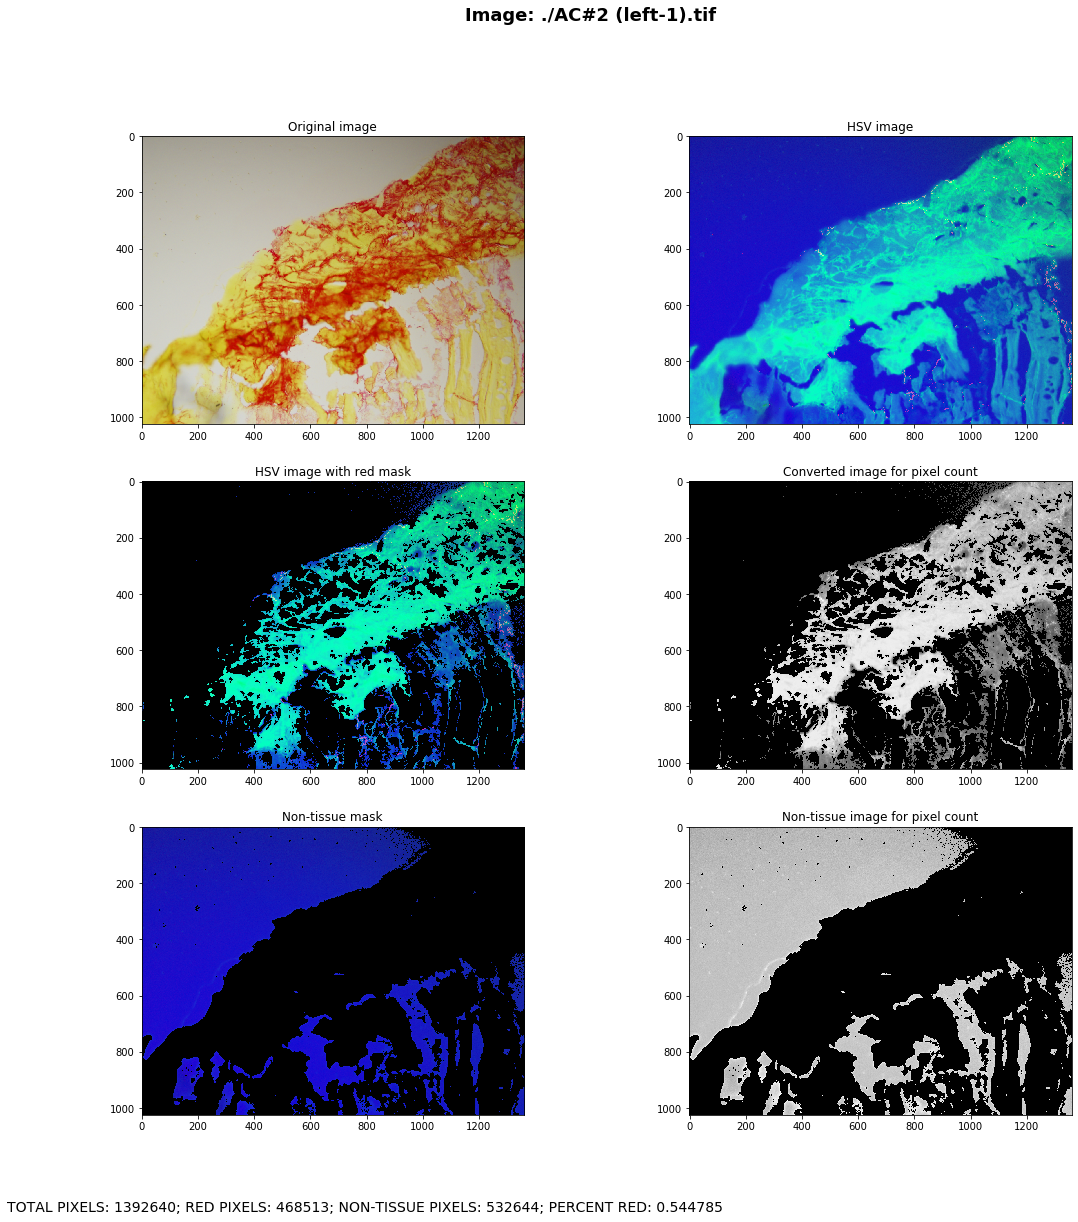

In [59]:
path, red_pixel_area, non_tissue_area, total_area, percentage = get_pixel_count("./AC#2 (left-1).tif", True)

In [62]:
path = ""
img_name = "test.png"
# cv2.imwrite(f"./{path}/{img_name}", cv2.cvtColor(white_mask_img_gray, cv2.COLOR_GRAY2BGR))
cv2.imwrite(f"./{path}/{img_name}", gray_img)
# plt.imshow(img_hsv,  aspect='auto')

True

RED PIXELS: 468513
NON-TISSUE PIXELS: 532644
TOTAL PIXELS: 1392640
PERCENT RED: 0.5447850920236839


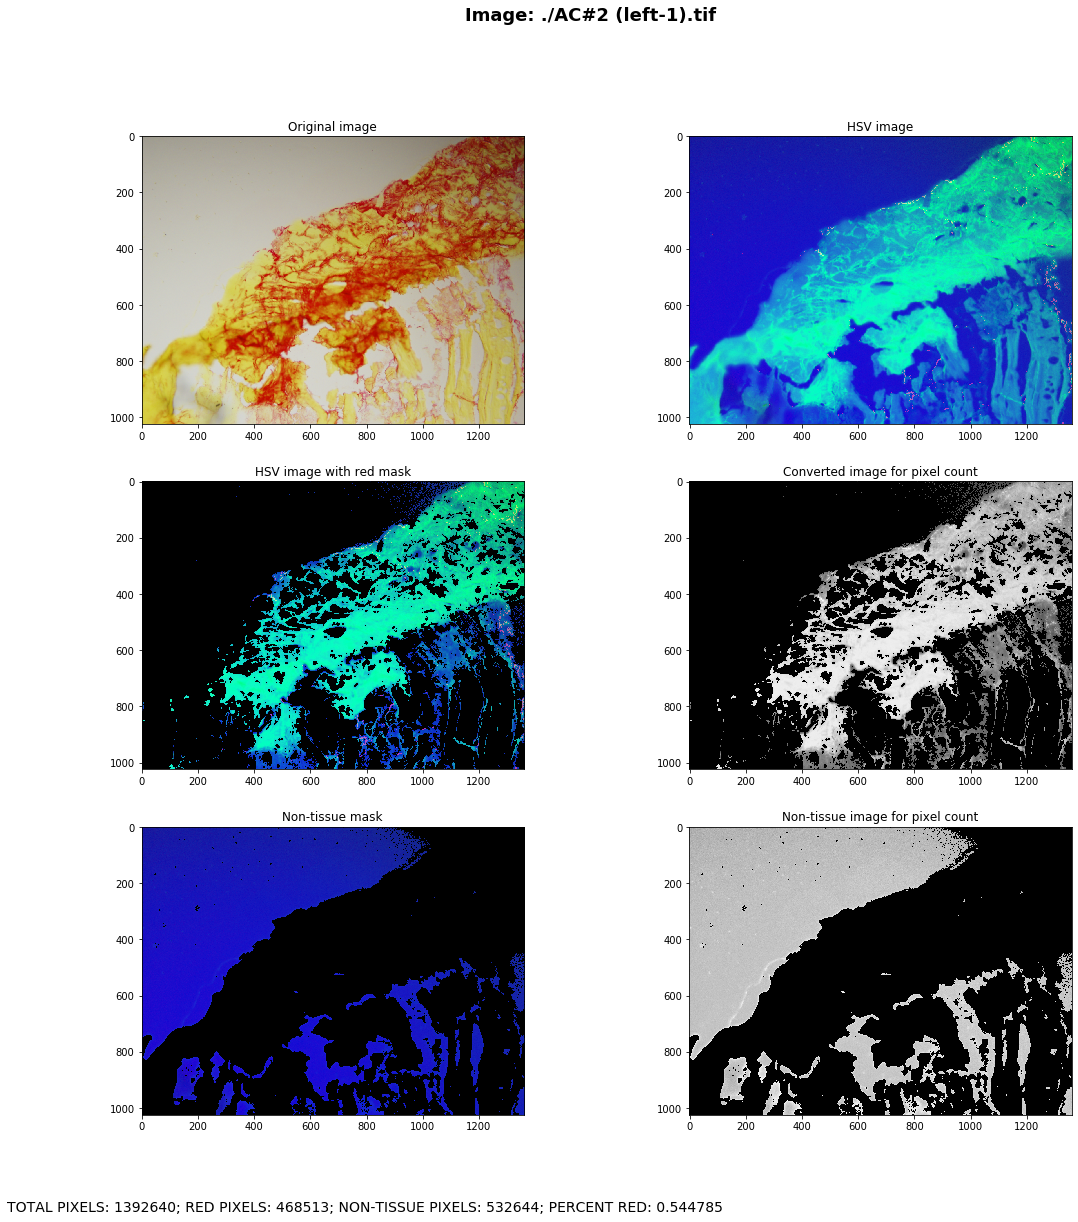

In [60]:
img_hsv, mask_img, gray_img, white_mask_img, white_mask_img_gray = get_pixel_count("./AC#2 (left-1).tif")


RED PIXELS: 118715
NON-TISSUE PIXELS: 480705
TOTAL PIXELS: 1392640
PERCENT RED: 0.13017923426560007


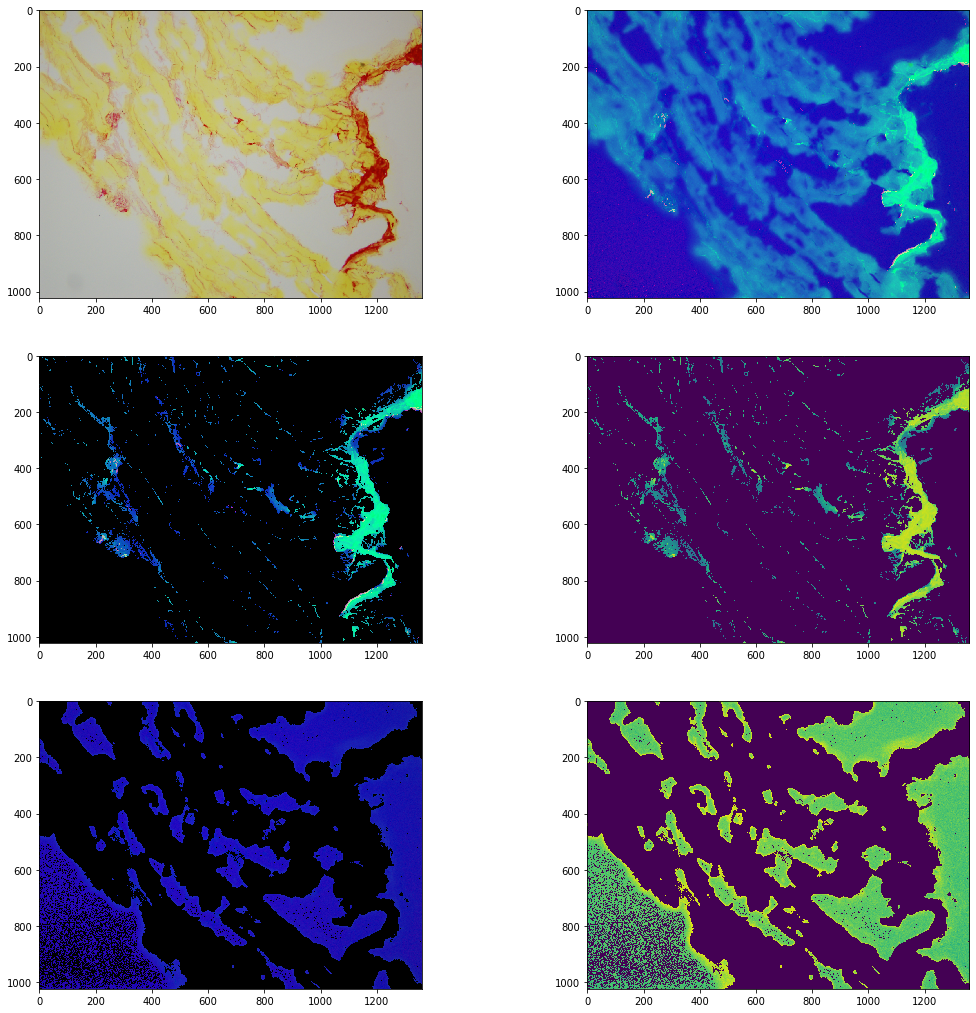

In [66]:
img_hsv = get_pixel_count("./CC2 (rightdown-2).tif")

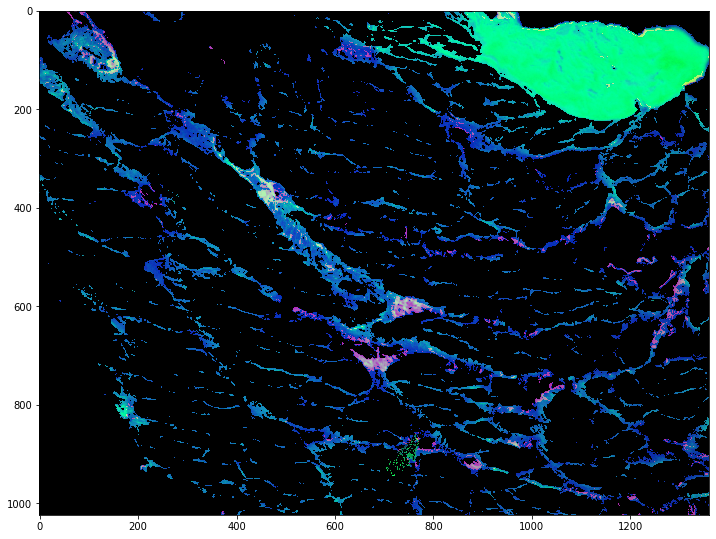

In [19]:
red_mask = create_mask(img_hsv, ['red'])
mask_img = cv2.bitwise_and(img_hsv, img_hsv, mask=red_mask)
show_img(mask_img)

In [ ]:
# gray_image = cv2.cvtColor(mask_img, cv2.COLOR_BGR2GRAY)
# show_img(gray_image)
# nonzero = cv2.countNonZero(gray_image)

# print(nonzero, nonzero/(gray_image.shape[0] * gray_image.shape[1]))

In [118]:
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir("./") if f.endswith(".tif")]
# print(onlyfiles)

In [10]:
import numpy as np

def pca_color_augmentation_numpy(image_array_input):
    assert image_array_input.ndim == 3 and image_array_input.shape[2] == 3
    assert image_array_input.dtype == np.uint8

    img = image_array_input.reshape(-1, 3).astype(np.float32)
    scaling_factor = np.sqrt(3.0 / np.sum(np.var(img, axis=0)))
    img *= scaling_factor

    cov = np.cov(img, rowvar=False)
    U, S, V = np.linalg.svd(cov)

    rand = np.random.randn(3) * 0.1
    delta = np.dot(U, rand*S)
    delta = (delta * 255.0).astype(np.int32)[np.newaxis, np.newaxis, :]

    img_out = np.clip(image_array_input + delta, 0, 255).astype(np.uint8)
    return img_out

# from keras.datasets import cifar10
# import matplotlib.pyplot as plt

def demo_numpy(X):
    plt.figure(figsize=(8,8))
    plt.subplots_adjust(hspace=0.02, wspace=0.02)
    for i in range(100):
        ax = plt.subplot(10, 10, i+1)
        aug = pca_color_augmentation_numpy(X[i])
        ax.imshow(aug)
        ax.axis("off")
    plt.show()